# **US YouTube Trending Video Data Analysis**

## Project Summary

This project analyzes the US YouTube Trending Videos Dataset to understand how videos perform on YouTube and what factors influence their success. The study focuses on two main aspects:

#### 1. How quickly videos reach the trending list, and

#### 2. Whether the length of a video’s title and description affects engagement (views, likes, and comments).

To achieve this, the project uses Exploratory Data Analysis (EDA), including univariate, bivariate, and multivariate analysis. The dataset is processed to extract key features such as title length, description length, and days taken to appear in Trending after upload.
Various visualization techniques such as scatter plots, bar charts, histograms, correlation heatmaps,line chart ,pie chart and pivot tables are used to identify patterns and relationships.

## Problem Statement

To analyze the US YouTube Trending Videos dataset to understand how quickly videos reach the Trending list after upload, identify engagement patterns, and evaluate whether title and description length influence views, likes, and comments.


## Objective

- Analyze how quickly videos reach the Trending list using days_to_trend distribution, line charts, and category-wise comparisons.

- Study engagement patterns by exploring the distributions of views, likes, and comments through histograms and box plots.

- Evaluate whether title length influences engagement using scatter plots, line charts, and correlation analysis.

- Evaluate whether description length influences engagement using visualizations and correlations.

- Examine relationships among engagement metrics using correlation tables and heatmaps.

- Summarize category-level trends using groupby analysis, pivot tables, bar charts, and category distribution pie charts.

##  Data Loading and Initial Overview

In [1]:
# 📘 1. IMPORT LIBRARIES

# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Display
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
 #2. LOAD DATA
df = pd.read_csv('USvideos.csv/USvideos.csv')

In [3]:
# showing how many rows and columns there are.
df.shape

(40949, 16)

In [4]:
# Showing the first 10 rows
df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [5]:
# shows datatype, null values, memory usage, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
# Show statistical summary
df.describe()


,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


##  Data Pre-processing

### Handle Missing Data

In [7]:
# Checking for missing values in each column

df.isnull().sum()


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [8]:
df.isnull().sum().sum()


np.int64(570)

In [9]:
# Remove empty rows
df = df.dropna()


In [10]:
df.isnull().sum()
# Checking for missing values in each column ✅

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

### Handle Duplicates

In [11]:
# Check if there are any duplicate rows
df.duplicated().sum()


np.int64(47)

In [12]:
# Remove duplicate rows
df = df.drop_duplicates()


In [13]:
df.isnull().sum()
# Check if there are any duplicate rows ✅

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

### Formatting

The 'publish_time' column in the dataset was originally in string format.
To perform time-based analysis, it needs to be converted into a proper
datetime format.

Steps I did:
- Converted the 'publish_time' column to datetime type
- Verified the new data type

With the correct datetime format, we can easily extract year, month, day, etc.,
and use it for derived features.

In [14]:
# Convert Publish Time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'])



In [15]:
# Convert category_id to integer
df['category_id'] = df['category_id'].astype(int)


In [16]:
# Ensure likes, dislikes, views, comment_count are numbers
df['views'] = df['views'].astype(int)
df['likes'] = df['likes'].astype(int)
df['dislikes'] = df['dislikes'].astype(int)
df['comment_count'] = df['comment_count'].astype(int)


In [17]:
# Remove extra spaces from text columns
df['title'] = df['title'].str.strip()
df['channel_title'] = df['channel_title'].str.strip()


### Column Name Formatting

To improve readability and maintain consistency, the column names were cleaned and reformatted.
I converted all column names into Proper Case (first letter capital), replaced underscores with spaces, and standardized the naming style.
This helps make the dataset easier to understand during analysis.

In [18]:
df = df.rename(columns={
    "video_id": "Video ID",
    "trending_date": "Trending Date",
    "title": "Title",
    "channel_title": "Channel Title",
    "category_id": "Category ID",
    "publish_time": "Publish Time",
    "tags": "Tags",
    "views": "Views",
    "likes": "Likes",
    "dislikes": "Dislikes",
    "comment_count": "Comment Count",
    "thumbnail_link": "Thumbnail Link",
    "comments_disabled": "Comments Disabled",
    "ratings_disabled": "Ratings Disabled",
    "video_error_or_removed": "Video Error or Removed",
    "description": "Description"
})

In [19]:
df.columns

Index(['Video ID', 'Trending Date', 'Title', 'Channel Title', 'Category ID',
       'Publish Time', 'Tags', 'Views', 'Likes', 'Dislikes', 'Comment Count',
       'Thumbnail Link', 'Comments Disabled', 'Ratings Disabled',
       'Video Error or Removed', 'Description'],
      dtype='object')

In [20]:
df.head(20)

,Video ID,Trending Date,Title,Channel Title,Category ID,Publish Time,Tags,Views,Likes,Dislikes,Comment Count,Thumbnail Link,Comments Disabled,Ratings Disabled,Video Error or Removed,Description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13 19:07:23+00:00,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12 05:37:17+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12 21:50:37+00:00,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13 14:00:23+00:00,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13 13:45:16+00:00,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [21]:
df.dtypes


Video ID                               object
Trending Date                          object
Title                                  object
Channel Title                          object
Category ID                             int64
Publish Time              datetime64[ns, UTC]
Tags                                   object
Views                                   int64
Likes                                   int64
Dislikes                                int64
Comment Count                           int64
Thumbnail Link                         object
Comments Disabled                        bool
Ratings Disabled                         bool
Video Error or Removed                   bool
Description                            object
dtype: object

### Derived Features

In this section, we create new columns (features) that are needed to support our project aims.

Aim 1: To find how quickly videos reach the Trending list after being published.  
Aim 2: To explore whether title length and description length affect engagement.  

We first ensure both date columns are in the correct datetime format, and then create the new derived features.


In [22]:
# 1. Ensure Publish Time is clean datetime
df['Publish Time'] = pd.to_datetime(df['Publish Time'], errors='coerce')


In [23]:
# Remove timezone if present
if df['Publish Time'].dt.tz is not None:
    df['Publish Time'] = df['Publish Time'].dt.tz_convert(None)


In [24]:
# 2. Convert Trending Date to datetime 

df['Trending Date'] = pd.to_datetime(df['Trending Date'], format='%y.%d.%m', errors='coerce')


In [25]:
# 3. Confirm both date columns are datetime
print(df[['Publish Time', 'Trending Date']].dtypes)



Publish Time     datetime64[ns]
Trending Date    datetime64[ns]
dtype: object


In [26]:
# 4. Create days_to_trend
df['days_to_trend'] = (df['Trending Date'] - df['Publish Time']).dt.days

In [27]:
# Remove negative values 
df.loc[df['days_to_trend'] < 0, 'days_to_trend'] = None


In [28]:
# 5. Create Title Length 
df['title_length'] = df['Title'].astype(str).str.len()


In [29]:
# 6. Create Description Length 
df['description_length'] = df['Description'].astype(str).str.len()


In [30]:
# 7. Create Tag Count
df['tag_count'] = df['Tags'].astype(str).apply(lambda x: 0 if x == 'No Tags' else len(x.split('|')))


In [31]:
# 8. Engagement Ratios 
df['like_to_view_ratio'] = df['Likes'] / df['Views'].replace(0, None)
df['comment_to_view_ratio'] = df['Comment Count'] / df['Views'].replace(0, None)


In [32]:
# 9. Show sample of new features
df[['Publish Time', 'Trending Date', 'days_to_trend',
    'title_length', 'description_length',
    'tag_count', 'like_to_view_ratio', 
    'comment_to_view_ratio']].head()

,Publish Time,Trending Date,days_to_trend,title_length,description_length,tag_count,like_to_view_ratio,comment_to_view_ratio
0,2017-11-13 17:13:01,2017-11-14,0.0,34,1410,1,0.076869,0.021318
1,2017-11-13 07:30:00,2017-11-14,0.0,62,630,4,0.040179,0.005252
2,2017-11-12 19:05:24,2017-11-14,1.0,53,1177,23,0.045758,0.002563
3,2017-11-13 11:00:04,2017-11-14,0.0,32,1403,27,0.029641,0.006253
4,2017-11-12 18:01:41,2017-11-14,1.0,24,636,14,0.063097,0.008359


In [33]:
# Checking results of derived features

# Show first 5 rows with new columns
df.head(5)

# Show updated column list
df.columns

# Show summary statistics
df.describe()


,Trending Date,Category ID,Publish Time,Views,Likes,Dislikes,Comment Count,days_to_trend,title_length,description_length,tag_count,like_to_view_ratio,comment_to_view_ratio
count,40332,40332.000000,40332,4.033200e+04,4.033200e+04,4.033200e+04,4.033200e+04,40216.000000,40332.000000,40332.000000,40332.000000,40332.000000,40332.000000
mean,2018-02-27 10:03:40.648616448,19.942552,2018-02-12 08:29:14.133392640,2.370824e+06,7.462234e+04,3.508185e+03,8.289092e+03,14.698826,48.670460,1045.881831,19.926659,0.034657,0.004459
min,2017-11-14 00:00:00,1.000000,2006-07-23 08:24:11,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000
25%,2018-01-04 00:00:00,17.000000,2017-12-28 06:00:04,2.466670e+05,5.615500e+03,2.040000e+02,6.230000e+02,2.000000,34.000000,435.000000,10.000000,0.015322,0.001612
50%,2018-02-26 00:00:00,24.000000,2018-02-21 20:20:20,6.884230e+05,1.835150e+04,6.360000e+02,1.873000e+03,4.000000,47.000000,842.000000,19.000000,0.028500,0.002964
75%,2018-04-24 00:00:00,25.000000,2018-04-16 19:00:00,1.832174e+06,5.563025e+04,1.945250e+03,5.785000e+03,8.000000,61.000000,1394.000000,29.000000,0.046974,0.005221
max,2018-06-14 00:00:00,43.000000,2018-06-14 01:31:53,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06,4214.000000,100.000000,5123.000000,69.000000,0.290466,0.117643
std,NaN,7.595933,NaN,7.432121e+06,2.297311e+05,2.318773e+04,3.433488e+04,138.863859,19.579263,852.053649,11.947231,0.027030,0.005737


### Transformations

In this step, I am applying transformations to improve the quality of the data. 
Transformations help make the dataset more consistent and easier to analyze.


In [34]:

# 1. Convert title to lowercase
df['Title'] = df['Title'].str.lower()


In [35]:
# 2. Replace missing descriptions with "no description"
df['Description'] = df['Description'].fillna("no description")

In [36]:
# 3. Convert Tags to lowercase
df['Tags'] = df['Tags'].str.lower()


In [37]:
# 4. Replace missing tags with "no_tags"
df['Tags'] = df['Tags'].fillna("no_tags")


In [38]:
# 5. Fill missing numeric values with 0
numeric_cols = ['Views', 'Likes', 'Dislikes', 'Comment Count']
df[numeric_cols] = df[numeric_cols].fillna(0)

In [39]:
df.sample(5)


,Video ID,Trending Date,Title,Channel Title,Category ID,Publish Time,Tags,Views,Likes,Dislikes,...,Comments Disabled,Ratings Disabled,Video Error or Removed,Description,days_to_trend,title_length,description_length,tag_count,like_to_view_ratio,comment_to_view_ratio
33187,1Aoc-cd9eYs,2018-05-07,cobra kai ep 2 - strike first - the karate kid...,Cobra Kai,24,2018-05-02 16:02:35,"cobra kai|""karate kid""|""youtube red original s...",672609,4916,197,...,False,False,True,Present day Daniel LaRusso lives a charmed lif...,4.0,61,571,20,0.007309,0.001887
3978,Wzvr_rtI82w,2017-12-03,the $1000 smartphone giveaway!,Marques Brownlee,28,2017-11-28 00:58:09,"smartphone giveaway|""iphone x giveaway""|""note ...",1316758,147250,1028,...,False,False,False,✭ Follow on Instagram: http://instagram.com/db...,4.0,30,208,8,0.111828,0.029762
24092,V4kfrZSejVc,2018-03-16,video сhat. the cat is looking for daddy,CatPusic,15,2018-03-09 13:00:04,"videochat|""video chat""|""cat video chat""|""cat v...",256903,10501,159,...,False,False,False,When the master is very far from his cat Pusic...,6.0,40,508,10,0.040875,0.003939
18486,IqutUA3UOuw,2018-02-16,tessa virtue and scott moir kiss during sochi ...,souviendra,23,2018-02-11 18:45:54,kissy kissy,57958,218,7,...,False,False,False,Olympics Team Event – Ice Dance – Free Dance. ...,4.0,60,109,1,0.003761,0.000224
30500,rzVJrBOsf0M,2018-04-23,how to make a ping pong table // collab with e...,I Like To Make Stuff,26,2018-04-12 15:04:09,"ping pong|""ping pong table""|""table tennis""|""ev...",321548,8254,167,...,False,False,False,I made this awesome ping pong table with Evan ...,10.0,59,1304,16,0.025670,0.001962


## EDA & Visualization 




In this section, we explore the YouTube Trending dataset to understand important patterns related to our two aims: how quickly videos reach the Trending list, and whether title or description length affects engagement.

We begin with univariate analysis, where we study the distribution of individual variables such as views, likes, comments, title length, description length, and days_to_trend.
Then, through bivariate analysis, we compare two variables at a time to see how title and description length relate to engagement metrics and trending speed.

Next, we perform category-level analysis using groupby and pivot tables to understand how different categories vary in trending behaviour and engagement.

Finally, we include multivariate analysis such as correlation tables, heatmaps, and box plots to observe how multiple variables interact together.

Throughout the EDA, visualizations like histograms, scatter plots, bar charts, box plots, and heatmaps help us clearly present insights in a simple and meaningful way.

### Univariate Analysis
Here we examine the distribution of individual variables such as views, likes, 
comment counts, title length, description length, and days_to_trend. 
This helps us understand the basic patterns in the dataset.


In [40]:
df[['Views','Likes','Comment Count','days_to_trend','title_length','description_length']].describe()


,Views,Likes,Comment Count,days_to_trend,title_length,description_length
count,4.033200e+04,4.033200e+04,4.033200e+04,40216.000000,40332.000000,40332.000000
mean,2.370824e+06,7.462234e+04,8.289092e+03,14.698826,48.670460,1045.881831
std,7.432121e+06,2.297311e+05,3.433488e+04,138.863859,19.579263,852.053649
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000,3.000000,1.000000
25%,2.466670e+05,5.615500e+03,6.230000e+02,2.000000,34.000000,435.000000
50%,6.884230e+05,1.835150e+04,1.873000e+03,4.000000,47.000000,842.000000
75%,1.832174e+06,5.563025e+04,5.785000e+03,8.000000,61.000000,1394.000000
max,2.252119e+08,5.613827e+06,1.228655e+06,4214.000000,100.000000,5123.000000


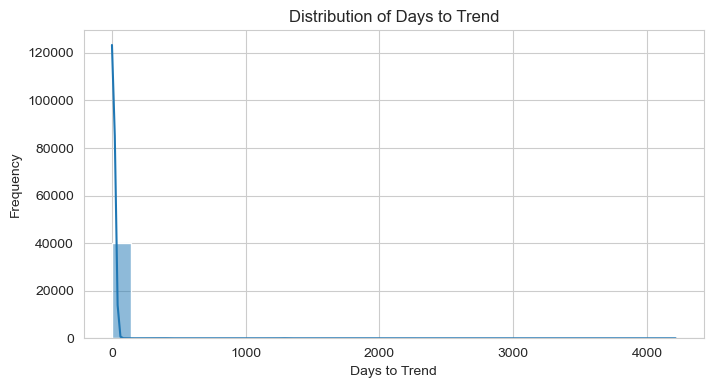

In [41]:
#Distribution of Days to Trend
plt.figure(figsize=(8,4))
sns.histplot(df['days_to_trend'], bins=30, kde=True)
plt.title("Distribution of Days to Trend")
plt.xlabel("Days to Trend")
plt.ylabel("Frequency")
plt.show()


#### Insights
The distribution is highly right-skewed, meaning most videos trend very quickly after being published.
A few videos take extremely long (outliers) to trend, creating a long tail.
This suggests trending usually happens early, and late-trending videos are rare.

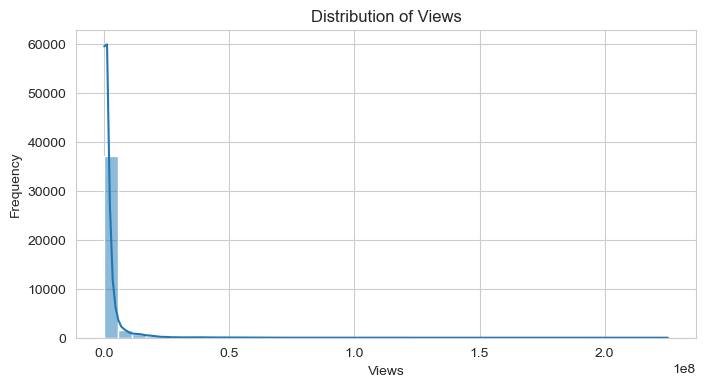

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(df['Views'], bins=40, kde=True)
plt.title("Distribution of Views")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()


#### Insights
Views are heavily right-skewed: most videos get comparatively low to moderate views, while a small number receive very high views.
This is a typical pattern in online platforms where only a few videos go truly viral.

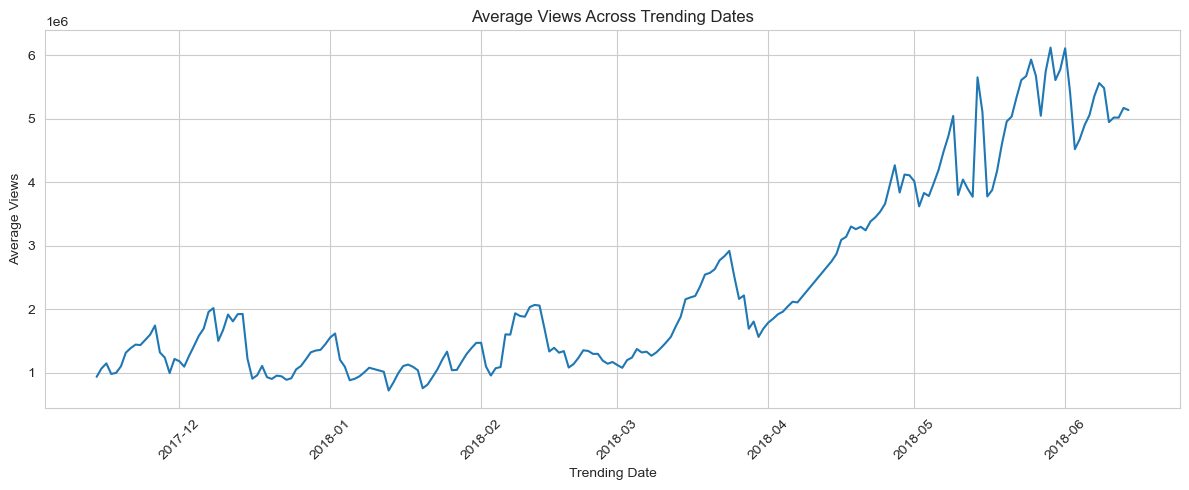

In [43]:
# Line Chart – Average Views per Trending Date
df_date = df.groupby('Trending Date')['Views'].mean().reset_index()

plt.figure(figsize=(12,5))
plt.plot(df_date['Trending Date'], df_date['Views'])
plt.title("Average Views Across Trending Dates")
plt.xlabel("Trending Date")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Insights
The line chart shows that average views increased steadily over time.
During early trending dates, videos received around 1–2 million views on average, but as time progressed, average views began rising sharply, eventually crossing 5–6 million views.
This pattern indicates that audience engagement grew over the months, meaning videos trended with higher view counts in later periods. It may reflect growing platform activity or more popular content being uploaded.

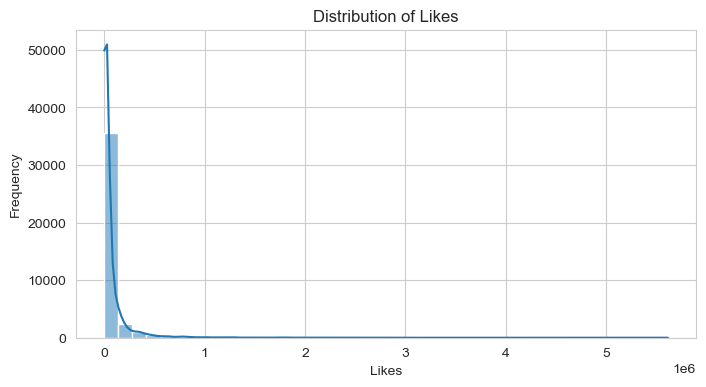

In [44]:
plt.figure(figsize=(8,4))
sns.histplot(df['Likes'], bins=40, kde=True)
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()



#### Insights
The likes distribution shows a similar pattern to views: most videos have fewer likes, and only a few have very high like counts.
This suggests engagement is dominated by a small number of highly popular videos

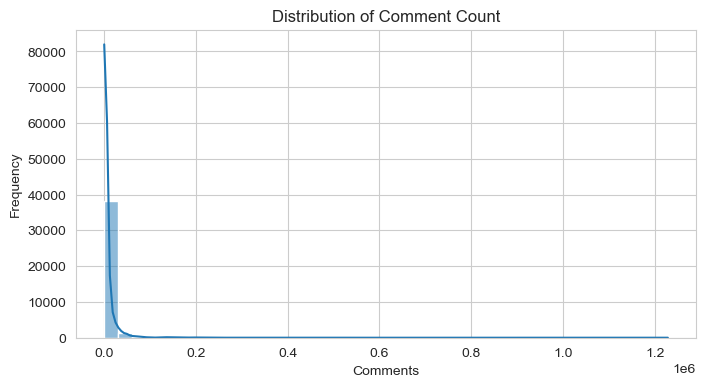

In [45]:
plt.figure(figsize=(8,4))
sns.histplot(df['Comment Count'], bins=40, kde=True)
plt.title("Distribution of Comment Count")
plt.xlabel("Comments")
plt.ylabel("Frequency")
plt.show()


#### Insights
Again, strongly right-skewed.
Most videos generate low comment activity, while a few get huge amounts of comments, indicating viral or highly engaging content.

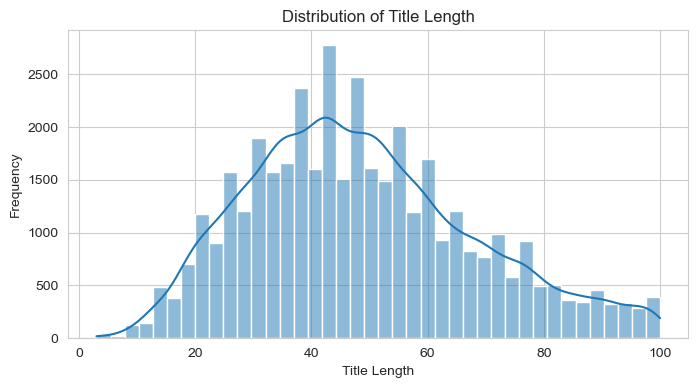

In [46]:
#Title & Description Length Distributions
plt.figure(figsize=(8,4))
sns.histplot(df['title_length'], bins=40, kde=True)
plt.title("Distribution of Title Length")
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.show()


#### insights
Title lengths form a near-normal distribution, mostly between 30 and 70 characters.
This shows creators generally follow a typical title length range — not too short, not too long.

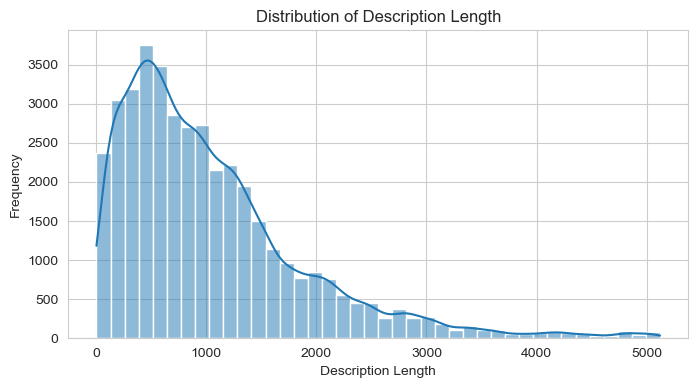

In [47]:
plt.figure(figsize=(8,4))
sns.histplot(df['description_length'], bins=40, kde=True)
plt.title("Distribution of Description Length")
plt.xlabel("Description Length")
plt.ylabel("Frequency")
plt.show()


#### Insights
Description length is right-skewed, meaning most descriptions are short to moderately long, while only a few are very long.
Some creators write extremely detailed descriptions, creating the long tail.

### Bivariate Analysis
Here we examine relationships between two variables.
This directly helps answer Aim 2 (engagement vs text features) 
and gives additional insight into Aim 1.


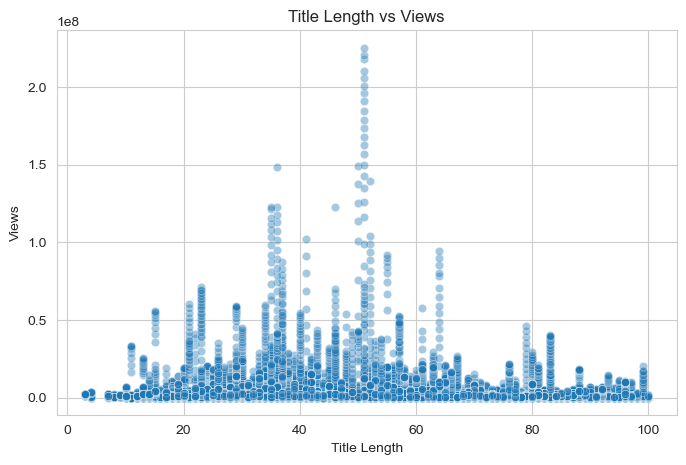

In [48]:
#Title Length vs Views
plt.figure(figsize=(8,5))
sns.scatterplot(x='title_length', y='Views', data=df, alpha=0.4)
plt.title("Title Length vs Views")
plt.xlabel("Title Length")
plt.ylabel("Views")
plt.show()


#### Insights
There is no strong linear relationship between title length and views.
However, moderate-length titles (around 30–60 characters) appear more common among high-view videos.
Very short or very long titles rarely reach extremely high views.

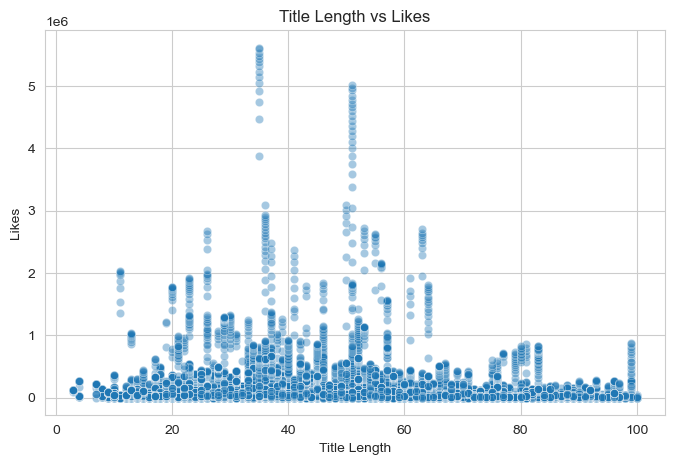

In [49]:
#Title Length vs Likes
plt.figure(figsize=(8,5))
sns.scatterplot(x='title_length', y='Likes', data=df, alpha=0.4)
plt.title("Title Length vs Likes")
plt.xlabel("Title Length")
plt.ylabel("Likes")
plt.show()


#### Insights
Similar to views, likes do not depend directly on title length.
The highest-like videos tend to have titles in the mid-range, not too short or too long.
This suggests that balanced, clear titles may help engagement.

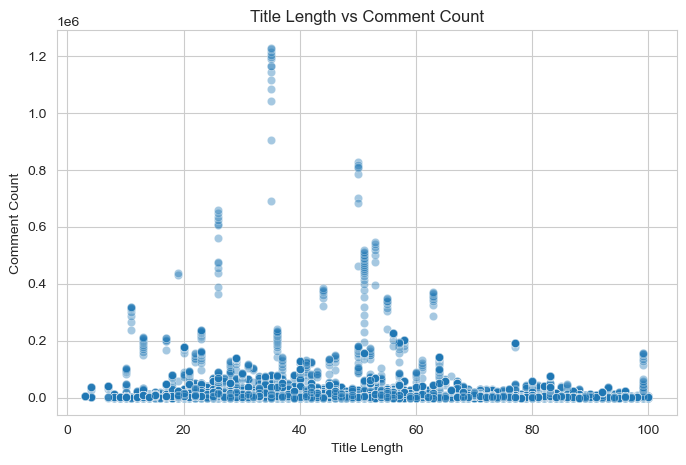

In [50]:
# Title Length vs Comment Count
plt.figure(figsize=(8,5))
sns.scatterplot(x='title_length', y='Comment Count', data=df, alpha=0.4)
plt.title("Title Length vs Comment Count")
plt.xlabel("Title Length")
plt.ylabel("Comment Count")
plt.show()


#### Insights
High-comment videos cluster around medium-length titles.Extremely long titles do not generate much engagement.

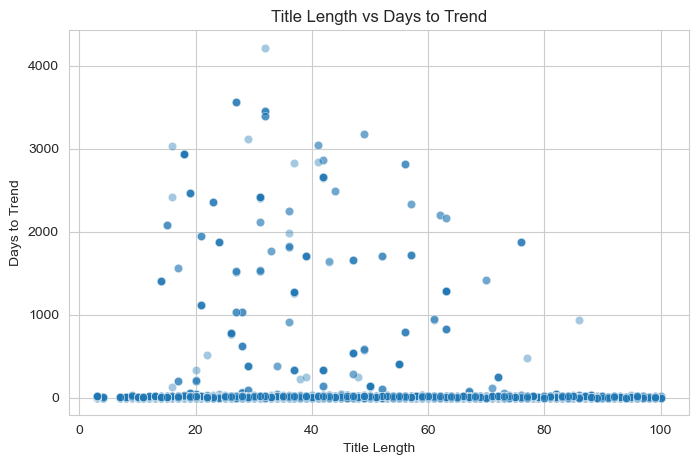

In [51]:
#Title Length vs Days to Trend
plt.figure(figsize=(8,5))
sns.scatterplot(x='title_length', y='days_to_trend', data=df, alpha=0.4)
plt.title("Title Length vs Days to Trend")
plt.xlabel("Title Length")
plt.ylabel("Days to Trend")
plt.show()

#### Insights
There is no visible correlation between title length and the time it takes for a video to trend.
Trending mostly happens early regardless of title length.
A few outliers show long trending delays, but they are scattered randomly.

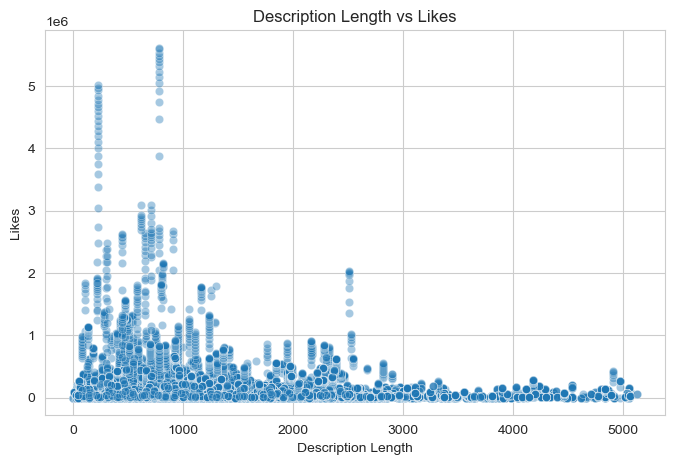

In [52]:
#Description Length vs Likes
plt.figure(figsize=(8,5))
sns.scatterplot(x='description_length', y='Likes', data=df, alpha=0.4)
plt.title("Description Length vs Likes")
plt.xlabel("Description Length")
plt.ylabel("Likes")
plt.show()


#### Insights
Likes are mostly high when description length is short to medium (0–1000 characters).
Very long descriptions (2000+ characters) rarely show high likes.
This suggests viewers may not engage more just because the creator writes a long description.

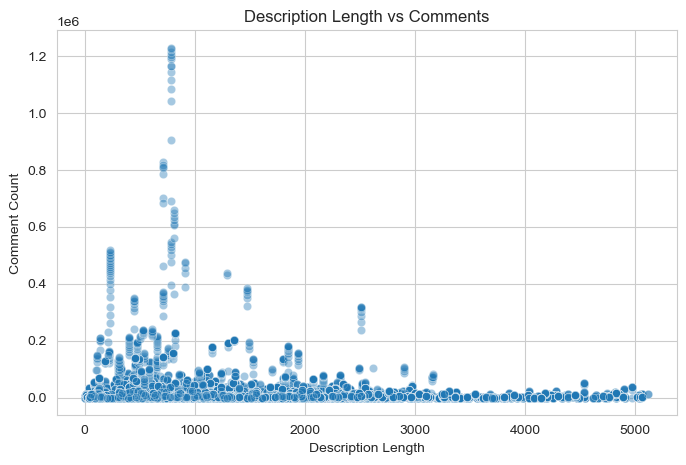

In [53]:
#Description Length vs Comment Count
plt.figure(figsize=(8,5))
sns.scatterplot(x='description_length', y='Comment Count', data=df, alpha=0.4)
plt.title("Description Length vs Comments")
plt.xlabel("Description Length")
plt.ylabel("Comment Count")
plt.show()


#### Insights
Comment count also peaks for short or medium-length descriptions.
Very long descriptions do not appear to boost interaction.
Engagement seems influenced more by content quality rather than description size.

### Category Analysis

####  Groupby Analysis
We analyze how different video categories perform in terms of trending speed.
This directly answers Aim 1.


In [54]:
#Category-wise Average Days to Trend
category_trend_speed = df.groupby('Category ID')['days_to_trend'].mean().sort_values()
category_trend_speed


Category ID
29     4.396226
19     6.105263
15     6.695415
26     6.862878
23     7.003217
43     9.719298
24    12.118816
22    12.528178
10    13.177195
28    17.357904
25    18.114072
27    20.307317
20    21.438442
17    22.886578
2     30.559682
1     40.228033
Name: days_to_trend, dtype: float64

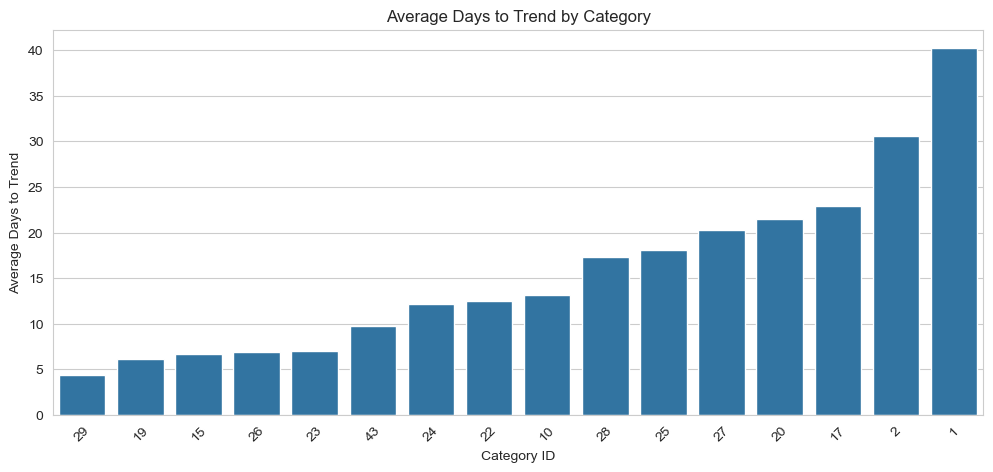

In [55]:
#Bar Plot
plt.figure(figsize=(12,5))
sns.barplot(x=category_trend_speed.index.astype(str),
            y=category_trend_speed.values)
plt.title("Average Days to Trend by Category")
plt.xlabel("Category ID")
plt.ylabel("Average Days to Trend")
plt.xticks(rotation=45)
plt.show()


#### Insight Summary 

This analysis shows that the time taken for videos to reach the Trending list varies significantly across categories. Categories such as 29, 19, 15, and 26 reach Trending the fastest, taking less than 8 days on average. In contrast, categories like 1 and 2 take the longest—over 30 days—indicating slower initial engagement. The wide difference between fast and slow categories suggests that content type plays an important role in how quickly a video gains popularity. These findings directly support Aim 1, as we clearly identify which categories trend quickly and which take more time.

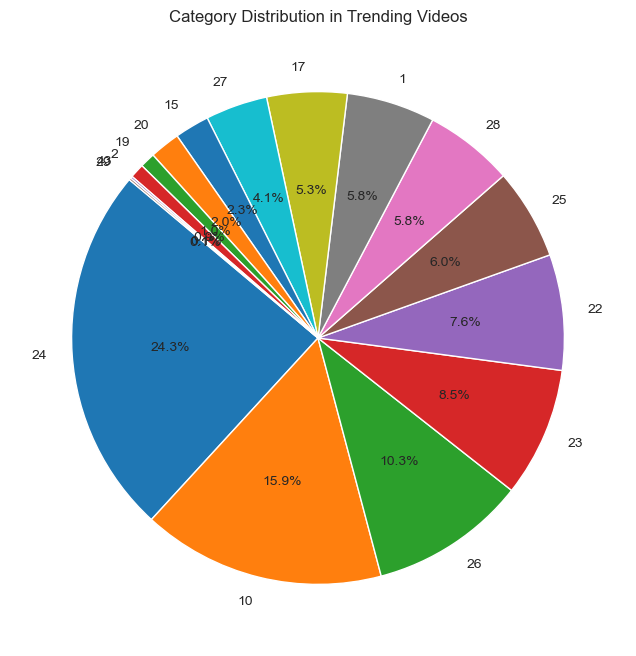

In [56]:
# Pie chart: Category distribution
category_counts = df['Category ID'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(category_counts.values,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=140)
plt.title("Category Distribution in Trending Videos")
plt.show()


#### Insights
The pie chart shows how frequently each video category appears in the US YouTube Trending dataset. Category 24 has the highest share (about 24%), meaning videos in this category trend more often than others. Categories 10, 26, 23, and 22 also appear frequently, showing they have strong audience engagement. Some categories have very small percentages, indicating they rarely trend. Overall, the chart helps us understand which content types dominate the trending list

#### Pivot Table Analysis
Pivot tables give a compact summary of how each category performs in engagement.



In [57]:
#Pivot Table: Category-level Engagement Summary
pivot = df.pivot_table(values='Views',
                       index='Category ID',
                       aggfunc=['mean','max','min','count'])
pivot


,mean,max,min,count
,Views,Views,Views,Views
Category ID,,,,
1,3.107903e+06,54863912,943,2338
2,1.373286e+06,25244097,2860,379
10,6.214107e+06,225211923,1591,6432
15,8.347004e+05,6187457,3393,916
17,2.070765e+06,29090799,658,2123
19,8.556125e+05,23932421,789,401
20,2.634002e+06,16935442,1237,802
22,1.527669e+06,56111957,884,3059


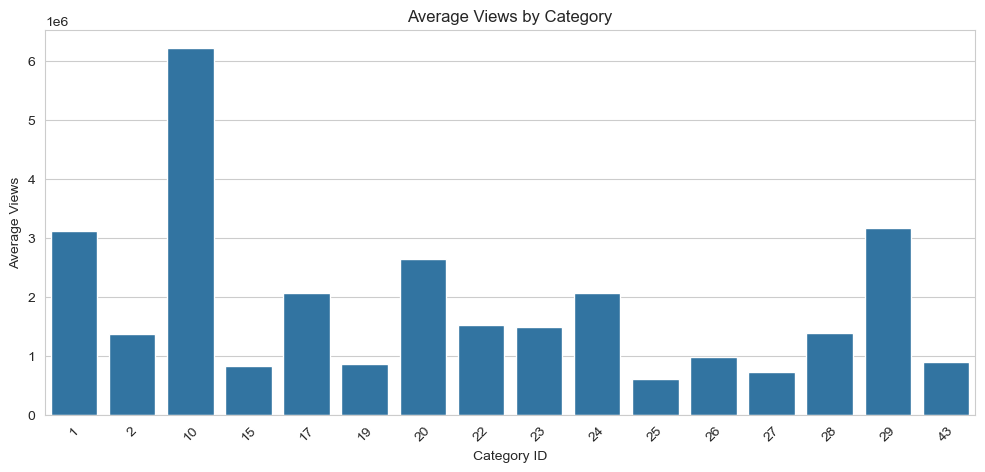

In [58]:
plot_df = pivot.reset_index()
plot_df.columns = ['Category_ID', 'mean', 'max', 'min', 'count']  # rename columns

plt.figure(figsize=(12,5))
sns.barplot(data=plot_df, x='Category_ID', y='mean')
plt.title("Average Views by Category")
plt.xlabel("Category ID")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
plt.show()


#### Insights

Category 10 has the highest average views (around 6M+), making it the most popular and most engaging category.
Categories 1 and 29 also receive high average views (around 3M+), showing strong audience interest.
Mid-level view categories such as 20, 24, and 17 get around 1.5M–2M views on average, indicating moderate engagement.
Categories 15, 19, 26, 43, 27, and 25 have lower average views (below 1M), meaning videos in these categories attract fewer viewers.
The large differences in average views indicate that category type strongly influences audience engagement.
High-view categories are more likely to have videos that reach the Trending list faster, linking this directly to Aim 1.
This analysis helps identify which types of content generally perform well and which categories have lower visibility.

###  Multivariate Analysis (Correlation)
We examine correlations between engagement metrics and derived features.


In [59]:
#Correlation Table
corr = df[['Views','Likes','Comment Count',
           'title_length','description_length','days_to_trend']].corr()
corr


,Views,Likes,Comment Count,title_length,description_length,days_to_trend
Views,1.000000,0.848746,0.655858,-0.034304,-0.016288,-0.012617
Likes,0.848746,1.000000,0.853417,-0.077412,-0.015978,-0.015943
Comment Count,0.655858,0.853417,1.000000,-0.062015,-0.006604,-0.012829
title_length,-0.034304,-0.077412,-0.062015,1.000000,0.058652,-0.042187
description_length,-0.016288,-0.015978,-0.006604,0.058652,1.000000,-0.053155
days_to_trend,-0.012617,-0.015943,-0.012829,-0.042187,-0.053155,1.000000


### Insights
Views, likes, and comments are strongly related to each other, showing that higher engagement moves together. Title length and description length have almost no relationship with engagement or days_to_trend.

####  Box Plot: Spread of Days to Trend
A box plot helps visualize outliers and the spread of the trending speed.


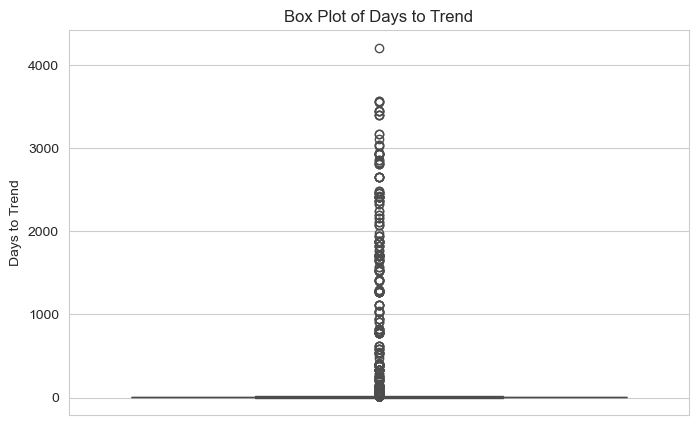

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df['days_to_trend'], color='orange')
plt.title("Box Plot of Days to Trend")
plt.ylabel("Days to Trend")
plt.show()


#### Insights
Most videos reach the Trending list very quickly, but there are a few extreme outliers that take a very long time. Trending speed varies widely across videos.

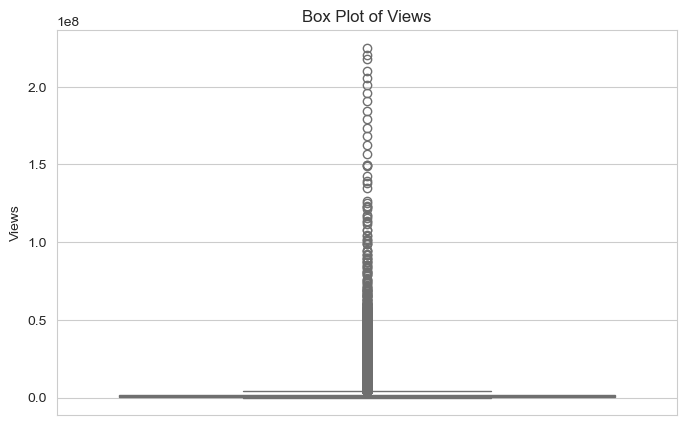

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df['Views'], color='skyblue')
plt.title("Box Plot of Views")
plt.ylabel("Views")
plt.show()


#### Insights
The box plot shows that views are extremely skewed. Most videos receive low to moderate views, forming a tight cluster near the bottom of the chart, while a small number of videos receive very high view counts, appearing as many outliers stretching upward. These high-view outliers represent viral videos that get millions of views. This confirms that YouTube engagement is dominated by a few highly successful videos, while the majority perform at an average level.

####  Heatmap: Correlation Between Key Variables
This helps visualize how variables affect each other.


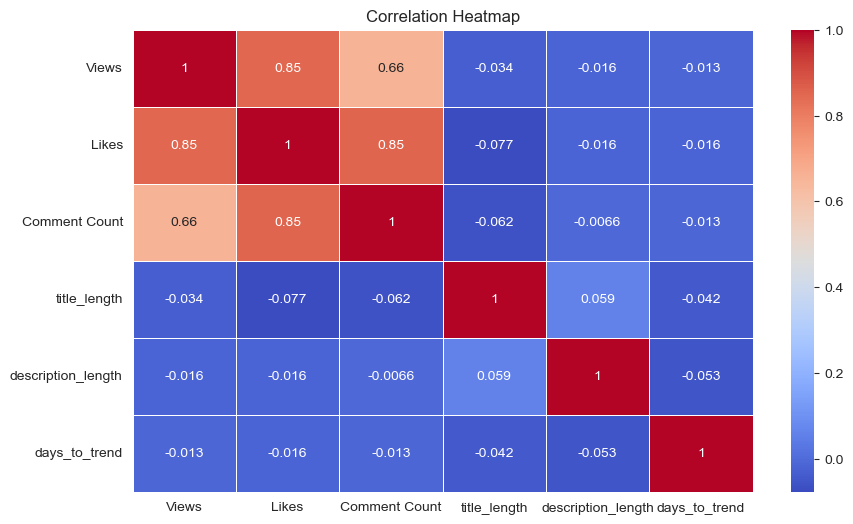

In [62]:
corr_matrix = df[['Views','Likes','Comment Count',
                  'title_length','description_length','days_to_trend']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



#### Insights
The heatmap confirms strong positive correlations among views, likes, and comments. Title length, description length, and days_to_trend show very weak or no correlation with engagement metrics.

## Key Insights

- Most videos reach the Trending list very quickly, usually within a few days of being published. However, a few videos take a very long time, showing high variation in trending speed.

- Views, likes, and comments are strongly correlated with each other. Videos that get more views also receive more likes and comments, confirming consistent engagement behaviour.

- Title length has almost no effect on engagement metrics. Longer or shorter titles do not significantly influence views, likes, or comments.

- Description length also does not affect engagement. The number of characters in the description shows no meaningful relationship with how well a video performs.

- Days_to_trend is not strongly related to title length, description length, or engagement. Trending speed is influenced by other factors not present in this dataset.

- Category-level performance varies a lot. Some categories (like Category 10 and 1) receive very high views on average, while others show much lower engagement. Category type plays a major role in determining video performance.

## Recommendations

- Creators should focus on producing content in strong-performing categories, as certain categories consistently gain higher views and may reach the trending list faster.

- Title length should not be over-optimized, because the analysis shows it has little impact on engagement. Instead, creators should prioritize clarity and relevance over length.

- Description length also does not drive engagement, so creators should use descriptions for information and keywords rather than worrying about length.

- Since engagement metrics correlate strongly, creators should aim to increase viewer interaction (likes, comments) because it naturally complements view growth.

- Platform analysts can use category-level insights to predict trending behaviour and recommend content strategies for creators based on trending speed and engagement stability.

- Future analysis could include additional factors such as thumbnail quality, posting time, tag sentiment, or channel subscriber count to understand trending behaviour more deeply.